In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import math

In [131]:
data=pd.read_csv("C:/Users/MELİH/Documents/house-prices/train.csv")

In [132]:
data.shape

(1460, 81)

In [133]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [134]:
def display_all(data):
    with pd.option_context("display.max_rows",1000,"display.max_columns",1000):
        display(data)

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [136]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [137]:
import re
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [138]:
data_compare=data.copy()
data_compare

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [139]:
data.items()
a=data.items()

In [140]:
next(a)

('Id',
 0          1
 1          2
 2          3
 3          4
 4          5
         ... 
 1455    1456
 1456    1457
 1457    1458
 1458    1459
 1459    1460
 Name: Id, Length: 1460, dtype: int64)

In [141]:
next(a)

('MSSubClass',
 0       60
 1       20
 2       60
 3       70
 4       60
         ..
 1455    60
 1456    20
 1457    70
 1458    20
 1459    20
 Name: MSSubClass, Length: 1460, dtype: int64)

In [142]:
b=next(a)
b

('MSZoning',
 0       RL
 1       RL
 2       RL
 3       RL
 4       RL
         ..
 1455    RL
 1456    RL
 1457    RL
 1458    RL
 1459    RL
 Name: MSZoning, Length: 1460, dtype: object)

In [143]:
b[0]

'MSZoning'

In [144]:
b[1]

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object

In [145]:
len(b[1])

1460

In [217]:
def train_cats(data_new):
    for n,c in data_new.items():
        if is_string_dtype(c):
            data_new[n]=c.astype("category").cat.as_ordered()

In [218]:
def apply_cats(data_new,train):
# df is the new dataframe (validation or test)
    for n,c in data_new.items():
        if train[n].dtype=="category":
# If the data type is categorical inthat column in train...
            data_new[n]=pd.Categorical(c,categories=train[n].cat.categories,ordered=True)

In [219]:
data_new=data.copy()
data_new

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [220]:
train_cats(data_new)

In [221]:
train_cats(data_compare)

In [222]:
data_new.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [223]:
data_new["LandContour"]

0       Lvl
1       Lvl
2       Lvl
3       Lvl
4       Lvl
       ... 
1455    Lvl
1456    Lvl
1457    Lvl
1458    Lvl
1459    Lvl
Name: LandContour, Length: 1460, dtype: category
Categories (4, object): [Bnk < HLS < Low < Lvl]

In [224]:
data_new["LandContour"].cat.categories

Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object')

In [225]:
data_new["LandContour"].cat.codes

0       3
1       3
2       3
3       3
4       3
       ..
1455    3
1456    3
1457    3
1458    3
1459    3
Length: 1460, dtype: int8

In [226]:
data_new["LandContour"].cat.set_categories(['Bnk', 'HLS', 'Low', 'Lvl'],ordered=True,inplace=True)

In [227]:
display_all(data_new.isnull().sum().sort_index()/len(data_new))

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.937671
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtFinType1     0.025342
BsmtFinType2     0.026027
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
BsmtQual         0.025342
BsmtUnfSF        0.000000
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000685
EnclosedPorch    0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
Fence            0.807534
FireplaceQu      0.472603
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
Functional       0.000000
GarageArea       0.000000
GarageCars       0.000000
GarageCond       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GrLivArea   

In [228]:
pd.isnull(data_new["LandContour"]).sum()

0

In [229]:
def fix_missing(data_new,col,name,nan_dict,is_train):
    if is_train :
        if is_numeric_dtype(col):
            if pd.isnull(col).sum():
# Returns hows many missing values thereare. If it is different than 0, it will execute the below function.
                data_new[name+"_na"]=pd.isnull(col)
                nan_dict[name]=col.median()
                data_new[name]=col.fillna(nan_dict[name])
    else:
        if is_numeric_dtype (col):
            if name in nan_dict:
                data_new[name+"_na"]=pd.isnull(col)
                data_new[name]=col.fillna(nan_dict[name])
            else:
                data_new[name]=col.fillna(data_new[name].median())

In [230]:
def numericalize (data_new,col,name):
    if not is_numeric_dtype(col):

        data_new[name]=col.cat.codes+1

In [231]:
def proc_df(data_new,y_fld,nan_dict=None,is_train=True):
 
    data_new=data_new.copy()
    
    y=data_new[y_fld].values
# Take df as values of sale price.
    data_new.drop(y_fld,axis=1,inplace=True)
# Drop y from data frame > it's not an input to the model.
    if nan_dict is None:
        nan_dict={}
    for n,c in data_new.items():
        fix_missing (data_new,c,n,nan_dict,is_train)
        numericalize(data_new,c,n)

    return data_new,y,nan_dict

In [232]:
def split_train_val(data_new,n):
    return data_new[:n].copy(), data_new[n:].copy()

In [233]:
n_valid=150

n_train=len(data_new)-n_valid 
train_df,valid_df=split_train_val(data_new,n_train)

In [234]:
x,y,nas=proc_df(train_df,'SalePrice')

In [235]:
x_valid,y_valid,nas=proc_df(valid_df,'SalePrice',nan_dict=nas,is_train=False)

In [236]:
x.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [237]:
y

array([208500, 181500, 223500, ..., 138000, 147000, 179200], dtype=int64)

In [238]:
display_all(data_new.tail().T)

,1455,1456,1457,1458,1459
Id,1456,1457,1458,1459,1460
MSSubClass,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL
LotFrontage,62,85,66,68,75
LotArea,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [239]:
len(x.columns)

83

In [240]:
m=RandomForestRegressor(n_estimators=10,n_jobs=-1)
m.fit(x,y)
m.score(x,y)

0.9700611625660596

In [241]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

In [242]:
def print_score(m):
    print(f"RMSE of train set {rmse(m.predict(x),y)}")
    print(f"RMSE of validation set {rmse(m.predict(x_valid),y_valid)}")
    print(f"R^2 of train set{m.score(x,y)}")
    print(f"R^2 of validation set {m.score(x_valid,y_valid)}")

In [243]:
m=RandomForestRegressor(n_estimators=10,n_jobs=6)
%time m.fit(x, y)
print_score(m)


Wall time: 65.8 ms
RMSE of train set 13233.278302240227
RMSE of validation set 27463.56486008083
R^2 of train set0.9726143659768839
R^2 of validation set 0.8637327316577686


In [246]:
def get_sample(data_new,n):
    idxs=sorted(np.random.permutation(len(data_new))[:n])
    return idxs,data_new.iloc[idxs].copy()

In [260]:
idxs,x=get_sample(x,150)
y=y[idxs]

In [261]:
x,y,nas=proc_df(train_df,'SalePrice')

In [262]:
from sklearn import tree

In [263]:
m=RandomForestRegressor(n_estimators=1,max_depth=3,bootstrap=False,n_jobs=-1)
t=m.fit(x,y)
print_score(m)

RMSE of train set 39891.59703651972
RMSE of validation set 42602.32106425785
R^2 of train set0.7511424880675979
R^2 of validation set 0.6720978583188173


In [264]:
estimator=m.estimators_[0]

[Text(1162.5, 1981.875, 'OverallQual <= 7.5\nmse = 6394580986.393\nsamples = 1310\nvalue = 181163.946'),
 Text(581.25, 1415.625, 'OverallQual <= 6.5\nmse = 2386164746.14\nsamples = 1105\nvalue = 157821.732'),
 Text(290.625, 849.375, 'GrLivArea <= 1378.5\nmse = 1378389849.946\nsamples = 816\nvalue = 140469.509'),
 Text(145.3125, 283.125, 'mse = 841766629.663\nsamples = 508\nvalue = 125633.882'),
 Text(435.9375, 283.125, 'mse = 1301715197.582\nsamples = 308\nvalue = 164938.659'),
 Text(871.875, 849.375, 'GrLivArea <= 2020.0\nmse = 1981020696.448\nsamples = 289\nvalue = 206816.246'),
 Text(726.5625, 283.125, 'mse = 1262624769.986\nsamples = 233\nvalue = 195290.579'),
 Text(1017.1875, 283.125, 'mse = 2117665074.545\nsamples = 56\nvalue = 254771.25'),
 Text(1743.75, 1415.625, 'OverallQual <= 8.5\nmse = 9233270607.439\nsamples = 205\nvalue = 306984.171'),
 Text(1453.125, 849.375, 'GrLivArea <= 1971.5\nmse = 3991138292.293\nsamples = 149\nvalue = 275411.221'),
 Text(1307.8125, 283.125, 'mse =

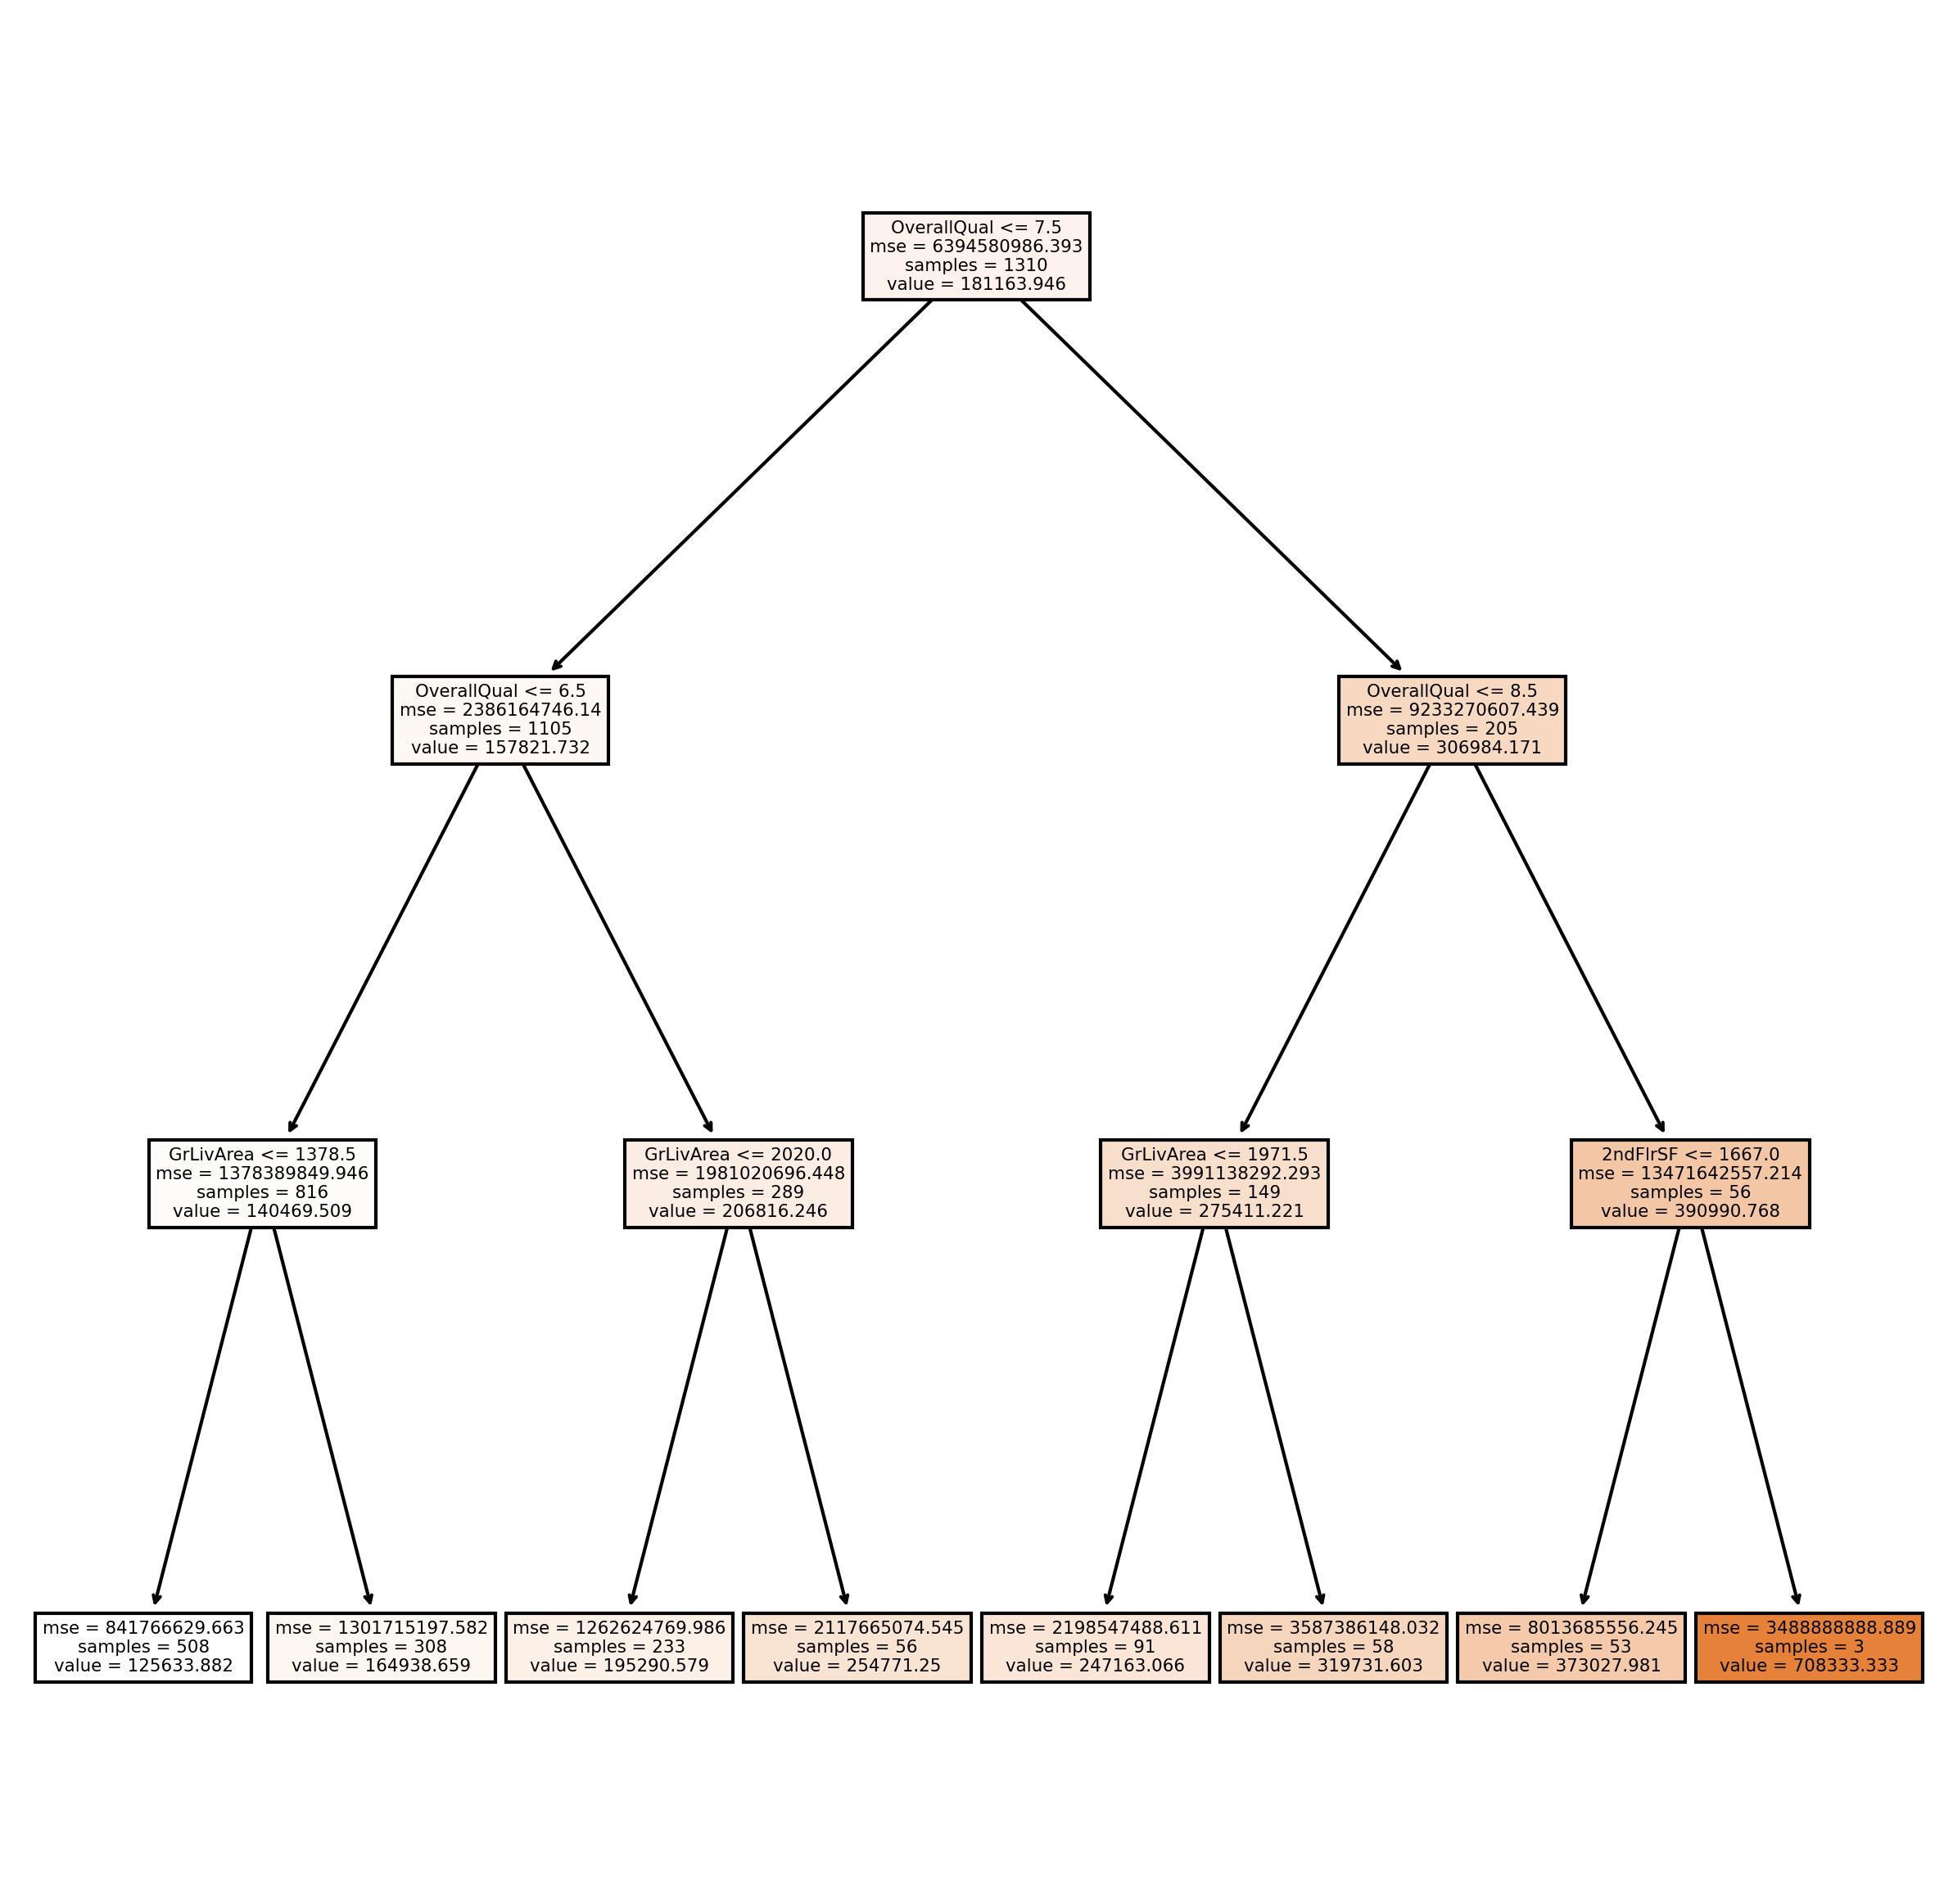

In [265]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(10,10),dpi=300)
tree.plot_tree(estimator,feature_names=data_new.columns,filled=True)

In [266]:
preds=np.array([t.predict(x_valid) for t in m.estimators_])
preds[:,0],np.mean(preds[:,0]),y_valid[0]

(array([195290.57939914]), 195290.57939914163, 335000)

In [267]:
np.mean(preds[:,0])

195290.57939914163

In [268]:
preds.shape

(1, 150)

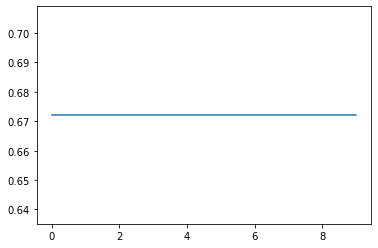

In [269]:
plt.plot([metrics.r2_score(y_valid,np.mean(preds[:i+1],axis=0))for i in range(10)])

In [270]:
from sklearn.ensemble import forest

In [271]:
def set_rf_samples(n):
    forest._generate_sample_indices=(lambda rs,n_samples:forest.check_random_state(rs).randint(0,n_samples,n))

In [272]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False),
   


m.fit(x,y)
score = m.score(x,y)
print(score)

0.7511424880675979
